In [1]:
# project: p5
# submitter: yzhang2232
# partner: none
# hours: 8

In [2]:
import pandas as pd
import edgar_utils as eu
from zipfile import ZipFile
from io import TextIOWrapper
from graphviz import Digraph
import geopandas as gpd
from shapely.geometry import box

In [3]:
#q1
server = pd.read_csv('server_log.zip')
int(sum(server['size']))

24801002666

In [4]:
#q2
server.groupby('ip').size().sort_values(ascending = False)[:10].to_dict()

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#q3
len(server[server['code']>=400])/len(server)

0.03466852724527611

In [6]:
#q4
server['file'] = server['cik'].map(int).map(str)+'/'+server['accession'].map(str)+'/'+server['extention'].map(str)
list(server.groupby('file').size().sort_values(ascending=False)[0:1].to_dict().keys())[0]

'1627631/0001627631-15-000004/.txt'

In [7]:
#q5
len(server[server['crawler']!=0])

971

In [8]:
server['region'] = server['ip'].apply(eu.lookup_region)

In [9]:
#q6
list(server.groupby('region').size().sort_values(ascending=False)[0:1].keys())[0]

'United States of America'

In [10]:
#q7
nested = server.groupby('region')[['ip']].apply(lambda x:x.value_counts().to_dict()).to_dict()
{k:len([i for i in list(v.values()) if i>1000])/len(v) for (k,v) in nested.items()}

{'-': 0.0,
 'Algeria': 0.0,
 'Angola': 0.0,
 'Armenia': 0.0,
 'Australia': 0.07692307692307693,
 'Austria': 0.0,
 'Bangladesh': 0.0,
 'Brazil': 0.0,
 'Bulgaria': 0.3333333333333333,
 'Canada': 0.017857142857142856,
 'China': 0.006864988558352402,
 'Croatia': 0.0,
 'Cyprus': 0.0,
 'Czechia': 0.0,
 'Denmark': 0.0,
 'Egypt': 0.0,
 'Estonia': 0.0,
 'Finland': 0.0,
 'France': 0.0036900369003690036,
 'Germany': 0.0,
 'Greece': 0.0,
 'Honduras': 0.0,
 'Hong Kong': 0.0,
 'Hungary': 0.0,
 'India': 0.058823529411764705,
 'Indonesia': 0.0,
 'Iraq': 0.0,
 'Ireland': 0.3125,
 'Israel': 0.0,
 'Italy': 0.0,
 'Japan': 0.0,
 'Jersey': 0.0,
 'Jordan': 0.0,
 'Korea (Republic of)': 0.2,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Liberia': 0.0,
 'Luxembourg': 0.0,
 'Malaysia': 0.0,
 'Mexico': 0.0,
 'Mongolia': 0.0,
 'Morocco': 0.0,
 'Netherlands': 0.0,
 'Nigeria': 0.0,
 'North Macedonia': 0.0,
 'Pakistan': 0.0,
 'Philippines': 0.0,
 'Poland': 0.0,
 'Portugal': 0.0,
 'Romania': 0.0,
 'Russian Federation': 0.0,
 'Sa

In [11]:
#q8
filings = {}
with ZipFile('docs.zip','r') as f:
    names = f.namelist()
    for name in names:
        if name.endswith('htm') or name.endswith('html'):
            with f.open(name,'r') as file:
                file = TextIOWrapper(file)
                data = file.read()
                value = eu.Filing(data)
                filings[name] = value
filings['850693/0000850693-07-000159/-index.htm'].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [12]:
#q9
states = {}
for i in filings:
    state = filings[i].state()
    if state != None:
        if not state in states:
            states[state] = 0
        states[state] += 1
states

{'OX': 6,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CA': 91,
 'CO': 25,
 'NY': 83,
 'TX': 64,
 'FL': 21,
 'AL': 1,
 'IN': 4,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 10,
 'IL': 25,
 'GA': 8,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [13]:
#q10
sics = {}
for i in filings:
    sic = filings[i].sic
    if sic != None:
        if not sic in sics:
            sics[sic] = 0
        sics[sic] += 1
sics

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [14]:
#q11
indus_sic = {}
for f in server['file']:
    if f in filings:
        sic = filings[f].sic
        if sic != None:
            if not sic in indus_sic:
                indus_sic[sic] = 0
            indus_sic[sic] += 1
indus_sic

{4931: 70,
 1000: 273,
 6021: 204,
 7371: 229,
 2860: 226,
 6211: 237,
 2834: 984,
 1389: 656,
 4522: 22,
 6282: 171,
 6022: 379,
 1700: 31,
 6331: 91,
 4813: 4,
 2836: 429,
 3620: 50,
 1311: 550,
 4841: 108,
 3272: 81,
 7200: 94,
 6513: 38,
 7374: 94,
 3510: 66,
 4512: 42,
 3826: 56,
 3678: 4,
 4911: 8,
 2510: 171,
 6798: 90,
 7830: 62,
 3571: 6,
 6221: 85,
 3621: 38,
 3695: 55,
 3590: 24,
 6321: 21,
 4812: 4,
 3312: 31,
 3842: 87,
 2870: 2,
 4955: 23,
 7370: 39,
 1040: 2,
 900: 39,
 4833: 7,
 6029: 83,
 3990: 34,
 5311: 90,
 5944: 33,
 3663: 23,
 8742: 27,
 5621: 99,
 8090: 32,
 4412: 43,
 8731: 25,
 7373: 48,
 8711: 2,
 6411: 3,
 3669: 2,
 5172: 36,
 3825: 164,
 3559: 20,
 2080: 1,
 3541: 1,
 7389: 26,
 2711: 1,
 7812: 25,
 7350: 1,
 1400: 3,
 5900: 35,
 3829: 73,
 5812: 19,
 3845: 2,
 6770: 2,
 3841: 14,
 7990: 1,
 2911: 1,
 6799: 46,
 1382: 2,
 3679: 5,
 3721: 1,
 5122: 34,
 5990: 1,
 1531: 4,
 5731: 1,
 5531: 1,
 6324: 30,
 2750: 1,
 4213: 35,
 1381: 31,
 2030: 1,
 3714: 1,
 7372

In [15]:
#q12
server['time'] = pd.to_datetime(server['time'], format ="%H:%M:%S")
hours = {}
for i in server['time']:
    if not i.hour in hours:
        hours[i.hour] = 0
    hours[i.hour] += 1
hours

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

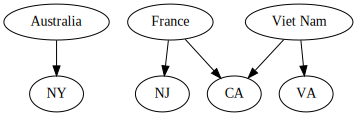

In [16]:
#q13
g = Digraph()
new = server[server['region'].isin(['Australia','France', 'Viet Nam'])]
coun_fil = {}
for i in new.groupby('region')['file']:
    country = i[0]
    states = []
    for file in i:
        for f in file:
            if f in filings:
                state = filings[f].state()
                if not state in states:
                    states.append(state)
            coun_fil[country] = states
for country in coun_fil:
    g.node(country)
    for state in coun_fil[country]:
        g.node(state)
        g.edge(country,state)
g

In [17]:
#q14
addr_count = {}
for i in server['file']:
    if i in filings:
        addrs = filings[i].addresses
        for addr in addrs:
            if not addr in addr_count:
                addr_count[addr] = 0
            addr_count[addr] += 1
addr_common = {}
for addr in addr_count:
    if addr_count[addr] >= 225:
        addr_common[addr] = addr_count[addr]
addr_common

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

In [18]:
west = -130
east = -55
north = 50
south = 20
crop = box(west,south,east,north)

<AxesSubplot:>

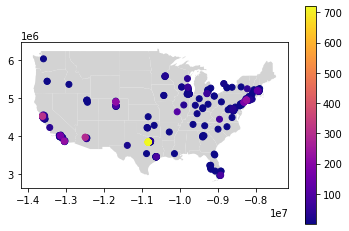

In [19]:
#q15
bg = gpd.read_file('shapes/cb_2018_us_state_20m.shp')
bg = bg[bg.intersects(crop)].to_crs('epsg:3395')
loc = gpd.read_file('locations.geojson')
loc = loc[loc.intersects(crop)].to_crs('epsg:3395')
count = pd.DataFrame.from_dict(addr_count, orient='index').rename(columns={0:"count"})
loc = loc.merge(count,how='left',left_on='address',right_on=count.index).sort_values(by='count')
ax = bg.plot(color = 'lightgrey')
loc.plot(ax=ax, cmap = 'plasma', column = 'count', legend = True)